In [18]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


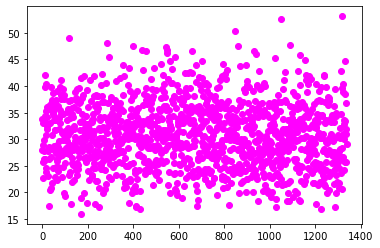

In [20]:
plt.scatter(df['bmi'].index,df['bmi'].values,color='magenta')

<AxesSubplot:>

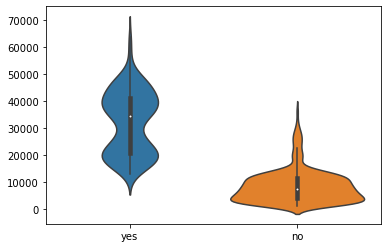

In [21]:
sns.violinplot(df['smoker'].values,df['charges'].values)

In [34]:
s=pd.crosstab(df['smoker'],df['region'])
s

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [35]:
from scipy.stats import chi2_contingency
chi2_contingency(s)


(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

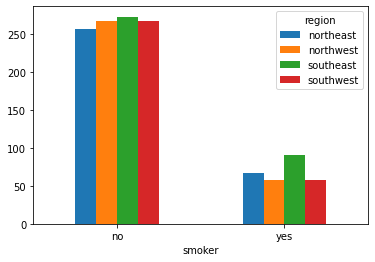

In [36]:
s.plot.bar(rot=0)
plt.show()

In [37]:
print('northeast smoking rate',67/(257+67))
print('northwest smoking rate',58/(267+58))
print('southeast smoking rate',91/(273+91))
print('southwest smoking rate',67/(267+58))

northeast smoking rate 0.20679012345679013
northwest smoking rate 0.17846153846153845
southeast smoking rate 0.25
southwest smoking rate 0.20615384615384616


<AxesSubplot:>

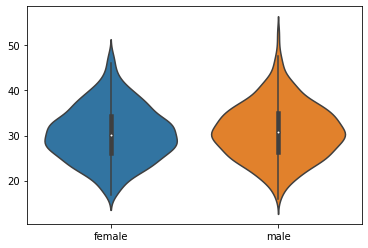

In [38]:
sns.violinplot(df['sex'].values,df['bmi'].values)

In [63]:
regionage=df[['region','age']]
regionage=regionage[regionage['age']<20]
pd.crosstab(regionage['region'],regionage['age']).sum(axis=1)


region
northeast    32
northwest    34
southeast    40
southwest    31
dtype: int64

<BarContainer object of 1338 artists>

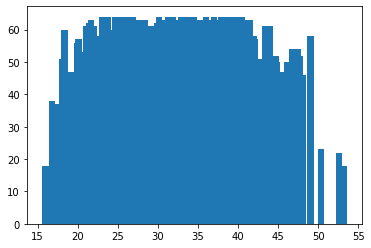

In [61]:

age=df['age']
bmi=df['bmi']
sortedin=df['age'].argsort()
plt.bar(bmi[sortedin],age[sortedin])


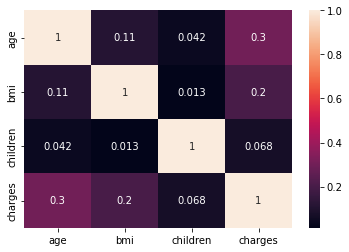

In [64]:
data=df
# check correlation 
sns.heatmap(data.corr(),annot=True)
plt.show()

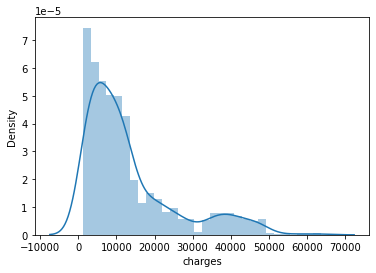

In [66]:
# checking how charges data is distributed
sns.distplot(data['charges'])
plt.show()

In [67]:
# data is skewed
data['charges'].skew()

1.5158796580240388

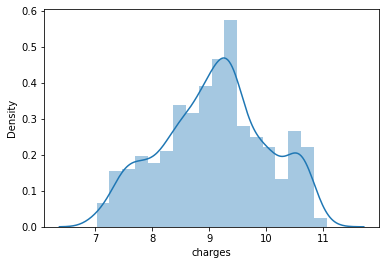

In [69]:
# data of charges are skewed(not normaliy distributed) soo we apply log transform to data
sns.distplot(np.log(data['charges']))
plt.show()

In [70]:
np.log(data['charges']).skew()

-0.09009752473024582

In [71]:
data['charges']=np.log(data['charges'])

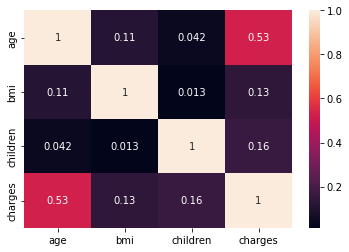

In [73]:
# correlation after applying log transform

sns.heatmap(data.corr(),annot=True)
plt.show()

In [74]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [75]:
# independent variables and dependent variable
x=data.drop('charges',1)
y=data['charges']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [ ]:
tr1=ColumnTransformer([
    ('one_hot',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

tr2=ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,7))
])

tr3=LinearRegression()

pipe=Pipeline([
    ('tr1',tr1),
    ('tr2',tr2),
    ('tr3',tr3)
   ])

# training the model
pipe.fit(x_train,y_train)

ypred_train=pipe.predict(x_train)
ypred_test=pipe.predict(x_test)

print('train_mode r2score',r2_score(y_train,ypred_train))
print('test_mode r2score',r2_score(y_test,ypred_test))
print('train_mode MAE',mean_absolute_error(y_train,ypred_train))
print('test_mode MAE',mean_absolute_error(y_test,ypred_test))
print('train_mode MSE',mean_squared_error(y_train,ypred_train))
print('test_mode MSE',mean_squared_error(y_test,ypred_test))
print('train_mode RMSE',np.sqrt(mean_squared_error(y_train,ypred_train)))
print('test_mode RMSE',np.sqrt(mean_squared_error(y_test,ypred_test)))